## API's - Application programming interface

Collection of endpoints

It is a way for two or more computer programs to communicate with each other

A type of software interface, offering a service to other pieces of software.

# Business Case

The objective is to define the likelihood of an employee's absence at work

### Importing and initial analisys

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
raw_data = pd.read_csv('db/Absenteeism-data.csv')

df = raw_data.copy()

df.columns = ['ID', 'ReasonForAbsence', 'Date', 'TranspExpense',
       'DistanceToWork', 'Age', 'DailyWorkLoadAvg', 'BodyMassIndex',
       'Education', 'Children', 'Pets', 'AbsenteeismTimeHours']

pd.options.display.max_columns = None
pd.options.display.max_rows= 50

display(df)

,ID,ReasonForAbsence,Date,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [3]:
df.info() #here we can see there are no empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    700 non-null    int64  
 1   ReasonForAbsence      700 non-null    int64  
 2   Date                  700 non-null    object 
 3   TranspExpense         700 non-null    int64  
 4   DistanceToWork        700 non-null    int64  
 5   Age                   700 non-null    int64  
 6   DailyWorkLoadAvg      700 non-null    float64
 7   BodyMassIndex         700 non-null    int64  
 8   Education             700 non-null    int64  
 9   Children              700 non-null    int64  
 10  Pets                  700 non-null    int64  
 11  AbsenteeismTimeHours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [4]:
df = df.drop(['ID'],axis=1) 
#axis=0 (default) will look for the value on the vertical axis 
#axis=1 -> will look for it on the horizontal axis

df

,ReasonForAbsence,Date,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


<AxesSubplot: xlabel='Children', ylabel='AbsenteeismTimeHours'>

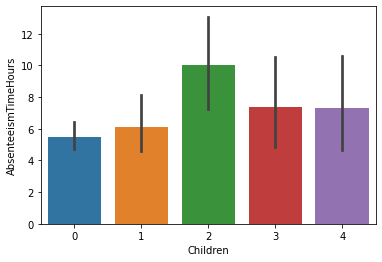

In [5]:
sns.barplot(df, x='Children', y='AbsenteeismTimeHours')

<AxesSubplot: xlabel='ReasonForAbsence', ylabel='AbsenteeismTimeHours'>

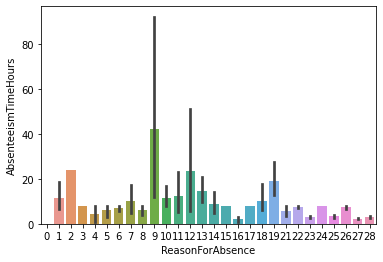

In [6]:
sns.barplot(df, x='ReasonForAbsence', y='AbsenteeismTimeHours')

In [7]:
df['ReasonForAbsence'].mean()

19.411428571428573

In [8]:
df['ReasonForAbsence'].min()

0

In [9]:
df['ReasonForAbsence'].max()

28

In [10]:
sorted(df['ReasonForAbsence'].unique())

# or -> sorted(pd.unique(df['ReasonForAbsence']))

#from below output we can see only number 20 is missing from 0 to 28

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [11]:
len(pd.unique(df['ReasonForAbsence']))

28

## Creating Dummy Variables and changing data types

In [12]:
# the first column must be dropped to prevent multicolinearity

reasonForAbsence = pd.get_dummies(df['ReasonForAbsence'], drop_first=True)

Removing the original data from the df

In [17]:
df = df.drop(['ReasonForAbsence'], axis=1)

    Grouping the variables by category to decrease the total number

They will be grouped into 4 categories

reasonCategory_1 -> Various diseases     
reasonCategory_2 -> Pregnancy / giving birth     
reasonCategory_3 -> Poisoning      
reasonCategory_4 -> Light Diseases     

In [18]:
reasonCategory_1 = reasonForAbsence.loc[:,1:14].max(axis=1)
reasonCategory_2 = reasonForAbsence.loc[:,15:17].max(axis=1)
reasonCategory_3 = reasonForAbsence.loc[:,18:21].max(axis=1)
reasonCategory_4 = reasonForAbsence.loc[:,21:].max(axis=1)

    Concatenating the dummy variables

In [19]:
df = pd.concat([df, reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4],axis=1) # axis =1 will add the data on the columns, axis-0 will add them on the lines

In [20]:
df.columns.values

array(['Date', 'TranspExpense', 'DistanceToWork', 'Age',
       'DailyWorkLoadAvg', 'BodyMassIndex', 'Education', 'Children',
       'Pets', 'AbsenteeismTimeHours', 0, 1, 2, 3], dtype=object)

In [13]:
type(df['Date'][0]) # currently 'Date' is a series of Strings

str

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') #changing the values on column 'Date' to a 'datetime' variable

type(df['Date'][0]) 

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

    Renaming and reordering the columns

Renaming

In [21]:
df.columns=['Date', 'TranspExpense', 'DistanceToWork', 'Age','DailyWorkLoadAvg', 'BodyMassIndex', 'Education', 'Children', 'Pets', 'AbsenteeismTimeHours', 
            'reasonCategory_1', 'reasonCategory_2', 'reasonCategory_3', 'reasonCategory_4']

Reordering

In [22]:
df = df[['reasonCategory_1', 'reasonCategory_2', 'reasonCategory_3', 'reasonCategory_4',
       'Date', 'TranspExpense', 'DistanceToWork', 'Age','DailyWorkLoadAvg', 'BodyMassIndex', 'Education', 'Children', 'Pets', 'AbsenteeismTimeHours']]

df

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,Date,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reasonCategory_1      700 non-null    uint8         
 1   reasonCategory_2      700 non-null    uint8         
 2   reasonCategory_3      700 non-null    uint8         
 3   reasonCategory_4      700 non-null    uint8         
 4   Date                  700 non-null    datetime64[ns]
 5   TranspExpense         700 non-null    int64         
 6   DistanceToWork        700 non-null    int64         
 7   Age                   700 non-null    int64         
 8   DailyWorkLoadAvg      700 non-null    float64       
 9   BodyMassIndex         700 non-null    int64         
 10  Education             700 non-null    int64         
 11  Children              700 non-null    int64         
 12  Pets                  700 non-null    int64         
 13  AbsenteeismTimeHours

### Creating a checkpoint

The modification done so far will be stored on a new df in case we need it

In [36]:
df_backup = df.copy()

### Extracting the month and days values from the date

In [25]:
#For the lenght of the df you may use:
len(df)
#or
df.shape[0] #.shape returns [rows,columns]. Index '0' will indicate we want only the row lenght

700

    Months

In [26]:
df['Date'][0].month

7

In [27]:
months = []

for i in range (len(df)):
    months.append(df['Date'][i].month)

In [28]:
df['Month'] = months

    Days

In [64]:
df['Date'][0].weekday() # 0=> monday, 1=tuesday, and so on

1

In [65]:
#in case we wanted to get the weeknames based on the codes:

#weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#days = []

#for i in range (len(df)):
#    days.append(weekdays[df['Date'][i].weekday()])

In [29]:
weekdays = []

for i in range (len(df)):
    weekdays.append(df['Date'][i].weekday())

In [30]:
df['Weekday'] = weekdays

In [31]:
df.drop(['Date'], axis=1)

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours,Month,Weekday
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,179,22,40,237.656,22,2,2,0,8,5,2
696,1,0,0,0,225,26,28,237.656,24,1,1,2,3,5,2
697,1,0,0,0,330,16,28,237.656,25,2,0,0,8,5,3
698,0,0,0,1,235,16,32,237.656,25,3,0,0,2,5,3


In [32]:
df = df[['reasonCategory_1', 'reasonCategory_2', 'reasonCategory_3', 'reasonCategory_4',
       'Month', 'Weekday', 'TranspExpense', 'DistanceToWork', 'Age','DailyWorkLoadAvg', 'BodyMassIndex', 'Education', 'Children', 'Pets', 'AbsenteeismTimeHours']]

df

,reasonCategory_1,reasonCategory_2,reasonCategory_3,reasonCategory_4,Month,Weekday,TranspExpense,DistanceToWork,Age,DailyWorkLoadAvg,BodyMassIndex,Education,Children,Pets,AbsenteeismTimeHours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,3,0,0,2


### Checking other columns

    Education:

1 -> High School

2 -> Graduate

3 -> Postgraduate

4 -> Master/doctor

In [33]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [34]:
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

### Last checkpoint and saving the preprocessed data

In [35]:
df_preprocessed = df.copy()

df_preprocessed.to_csv('db/Absenteeism-data-preprocessed.csv', index=False) # we set index to false so that it will not be duplicated once we load the dataframe again